In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("dataset/US_Accidents_March23.csv")
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [25]:
#  dataset exploration
df.shape, df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 45 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Country                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Temperature(F)         float64       
 18  Humidity(%)           

((7728394, 45), None)

In [26]:
df.isnull().sum().head(20)


ID                     0
Source                 0
Severity               0
Start_Time             0
End_Time               0
Start_Lat              0
Start_Lng              0
Distance(mi)           0
Description            5
Street                 0
City                   0
County                 0
State                  0
Zipcode                0
Country                0
Timezone               0
Airport_Code           0
Temperature(F)    163853
Humidity(%)       174144
Pressure(in)      140679
dtype: int64

In [27]:
#  Check for fractional seconds in datetime fields
bad_start = df['Start_Time'].astype(str).str.contains(r'\.\d+$', regex=True).sum()
bad_end   = df['End_Time'].astype(str).str.contains(r'\.\d+$', regex=True).sum()
bad_start, bad_end


(np.int64(0), np.int64(0))

In [28]:
#  Remove fractional seconds from Start_Time and End_Time

df['Start_Time'] = df['Start_Time'].astype(str).str.replace(r'\.\d+$', '', regex=True)
df['End_Time']   = df['End_Time'].astype(str).str.replace(r'\.\d+$', '', regex=True)


In [29]:
df['Start_Time'].head()


0    2016-02-08 05:46:00
1    2016-02-08 06:07:59
2    2016-02-08 06:49:27
3    2016-02-08 07:23:34
4    2016-02-08 07:39:07
Name: Start_Time, dtype: object

In [30]:
# Convert cleaned datetime strings into proper datetime format

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time']   = pd.to_datetime(df['End_Time'], errors='coerce')

# Check conversion success (NaT = failed)
df['Start_Time'].isna().sum(), df['End_Time'].isna().sum()


(np.int64(0), np.int64(0))

In [31]:
#  Create useful time features for analysis
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month


df[['Start_Time','Hour','Weekday','Month']].head()


,Start_Time,Hour,Weekday,Month
0,2016-02-08 05:46:00,5,Monday,2
1,2016-02-08 06:07:59,6,Monday,2
2,2016-02-08 06:49:27,6,Monday,2
3,2016-02-08 07:23:34,7,Monday,2
4,2016-02-08 07:39:07,7,Monday,2


In [33]:
#  Drop columns with very high missing values
cols_to_drop = ['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Weather_Timestamp']
df = df.drop(columns=cols_to_drop)
df.head()


KeyError: "['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Weather_Timestamp'] not found in axis"

In [23]:
#  Remove duplicate rows
before = df.shape
df = df.drop_duplicates()
after = df.shape

before, after


((7728394, 45), (7728394, 45))

In [34]:
#  Fill missing values in categorical columns with 'Unknown'
fill_unknown_cols = ['Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code']

for col in fill_unknown_cols:
    df[col] = df[col].fillna('Unknown')

df[fill_unknown_cols].isnull().sum()


Street          0
City            0
Zipcode         0
Timezone        0
Airport_Code    0
dtype: int64

In [ ]:
#  Fill numeric weather missing values with median
weather_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)']

for col in weather_cols:
    df[col] = df[col].fillna(df[col].median())


df[weather_cols].isnull().sum()


Temperature(F)    0
Humidity(%)       0
Pressure(in)      0
dtype: int64

 Milestone-2: Univariate Analysis

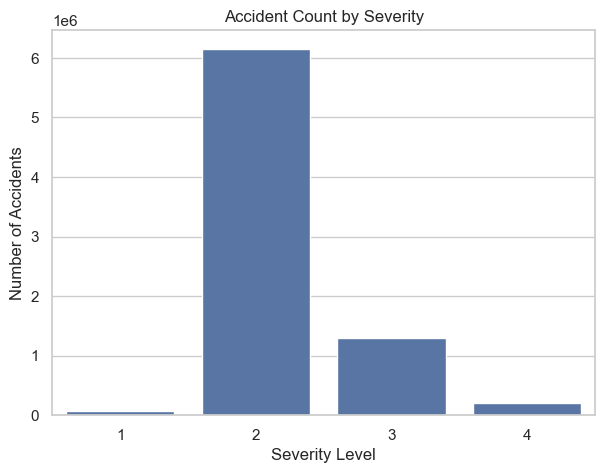

In [6]:
#  Severity distribution 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

severity_counts = df['Severity'].value_counts().sort_index()

plt.figure(figsize=(7,5))
sns.barplot(x=severity_counts.index, y=severity_counts.values)

plt.title("Accident Count by Severity")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()


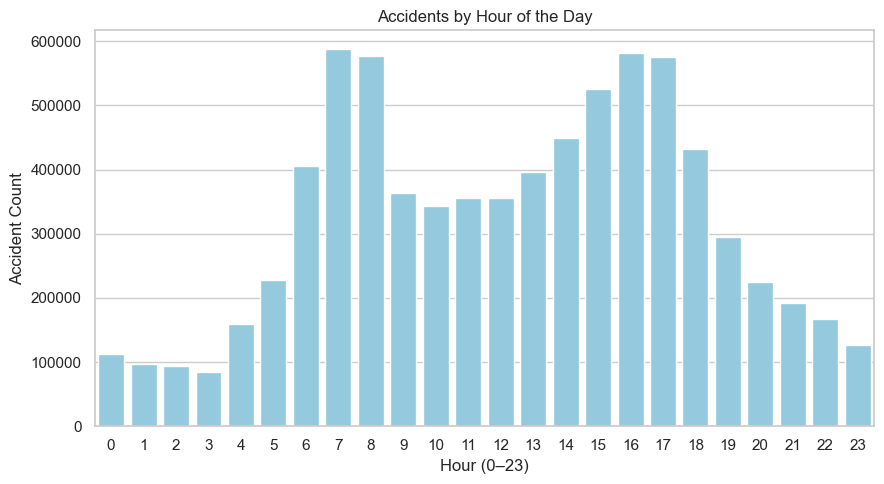

In [35]:
#  Hour-wise accident distribution

plt.figure(figsize=(9,5))
sns.countplot(x=df['Hour'], color='skyblue')

plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


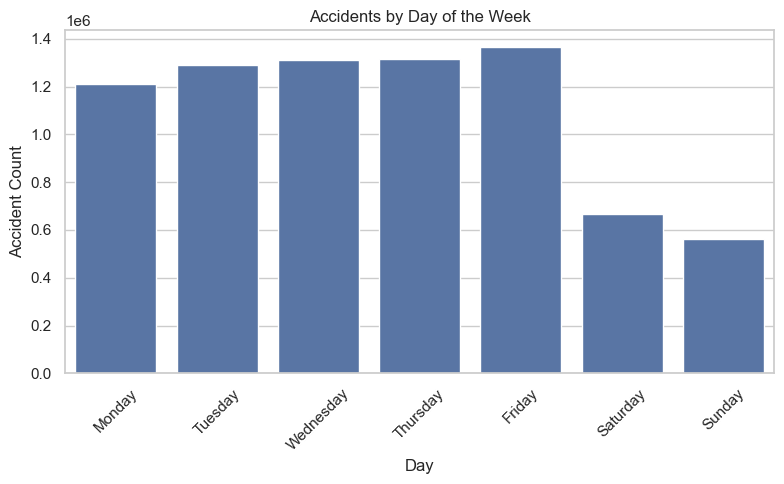

In [36]:
#  Accidents by Day of Week

plt.figure(figsize=(8,5))
sns.countplot(x=df['Weekday'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.title("Accidents by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


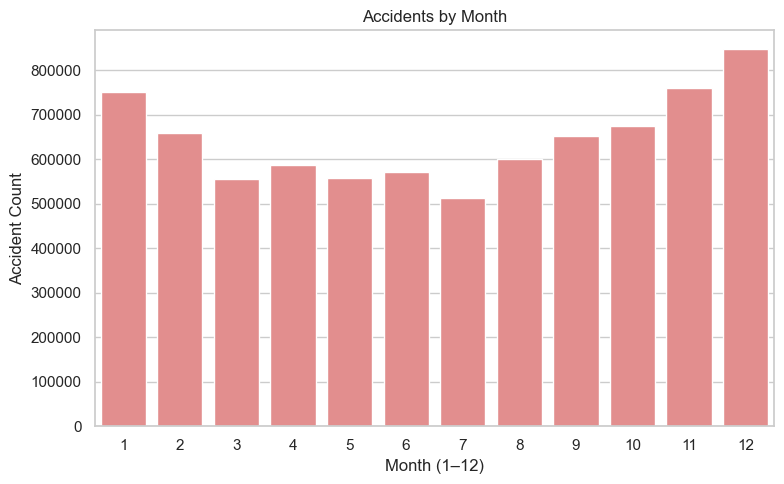

In [37]:
# Accidents by Month

plt.figure(figsize=(8,5))
sns.countplot(x=df['Month'], color='lightcoral')

plt.title("Accidents by Month")
plt.xlabel("Month (1–12)")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


In [38]:
df['Weather_Condition'].value_counts().head(10)


Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64

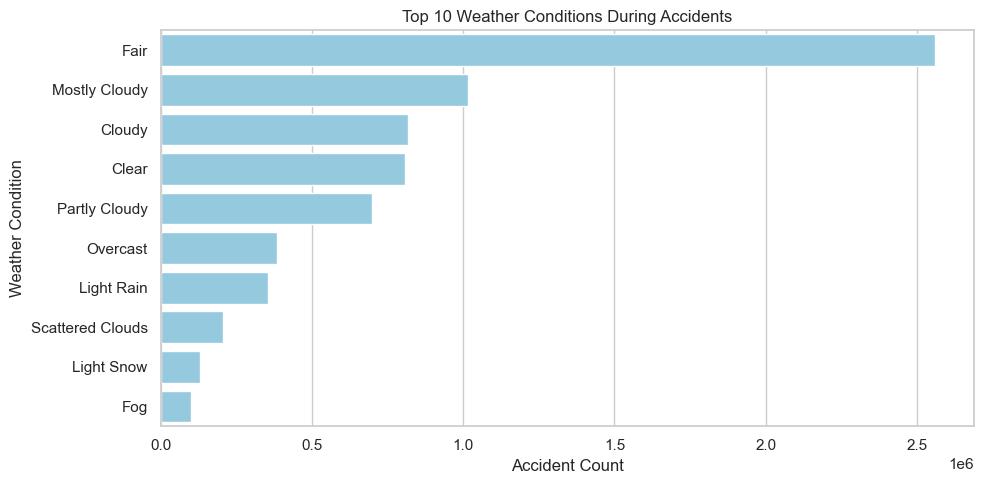

In [39]:
#  Top Weather Conditions During Accidents

top_weather = df['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_weather.values, y=top_weather.index, color='skyblue')

plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Accident Count")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()


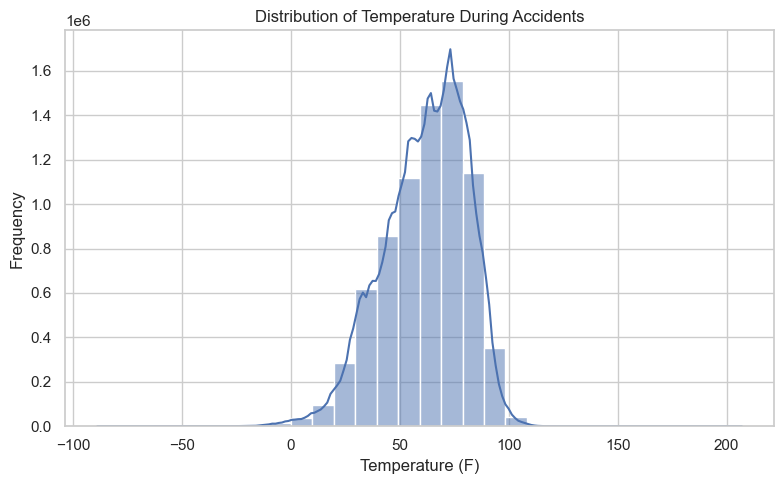

In [7]:
#  Distribution of Temperature during accidents

plt.figure(figsize=(8,5))
sns.histplot(df['Temperature(F)'], bins=30, kde=True)

plt.title("Distribution of Temperature During Accidents")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


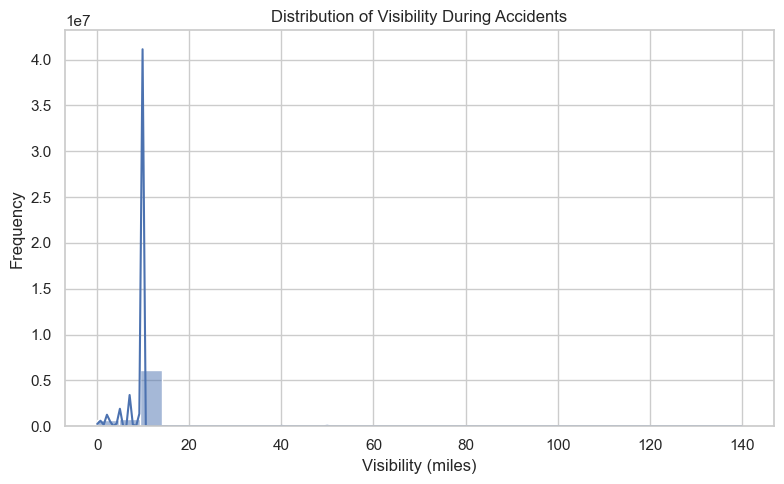

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['Visibility(mi)'], bins=30, kde=True)

plt.title("Distribution of Visibility During Accidents")
plt.xlabel("Visibility (miles)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


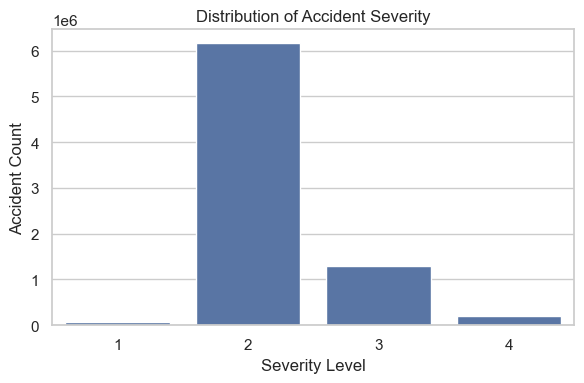

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Severity'])

plt.title("Distribution of Accident Severity")
plt.xlabel("Severity Level")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


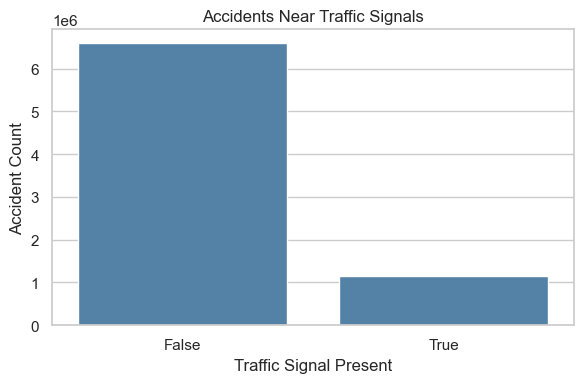

In [10]:
# Accidents near Traffic Signals

import matplotlib.pyplot as plt
import seaborn as sns

traffic_signal_counts = df['Traffic_Signal'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(
    x=traffic_signal_counts.index,
    y=traffic_signal_counts.values,
    color='steelblue'
)

plt.title("Accidents Near Traffic Signals")
plt.xlabel("Traffic Signal Present")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


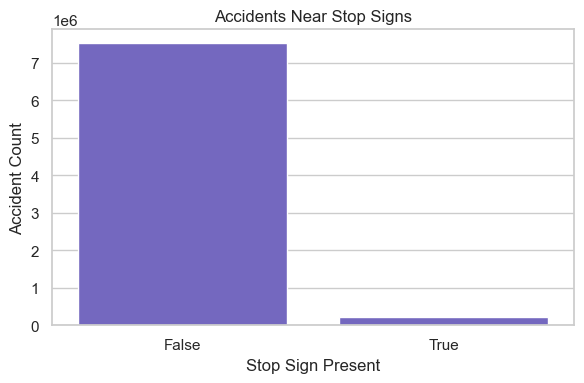

In [11]:
# Accidents near Stop signs

stop_counts = df['Stop'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(
    x=stop_counts.index,
    y=stop_counts.values,
    color='slateblue'
)

plt.title("Accidents Near Stop Signs")
plt.xlabel("Stop Sign Present")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


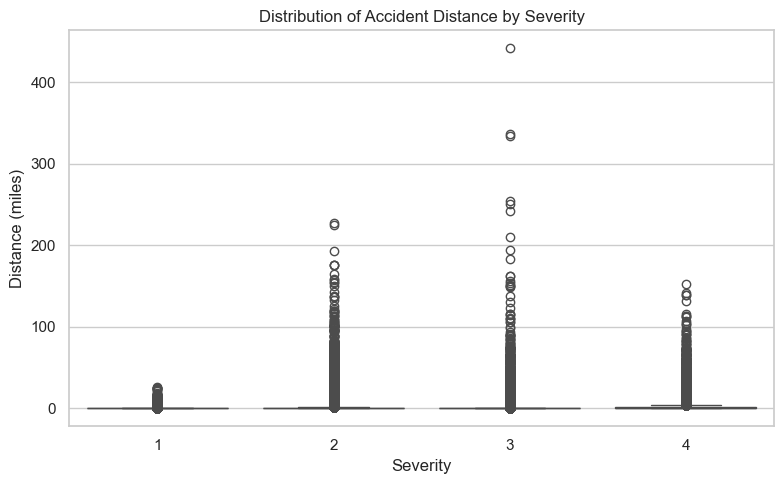

In [7]:
# Week 4 -  Box plot of accident distance by severity

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='Severity', y='Distance(mi)', data=df)

plt.title("Distribution of Accident Distance by Severity")
plt.xlabel("Severity")
plt.ylabel("Distance (miles)")
plt.tight_layout()
plt.show()


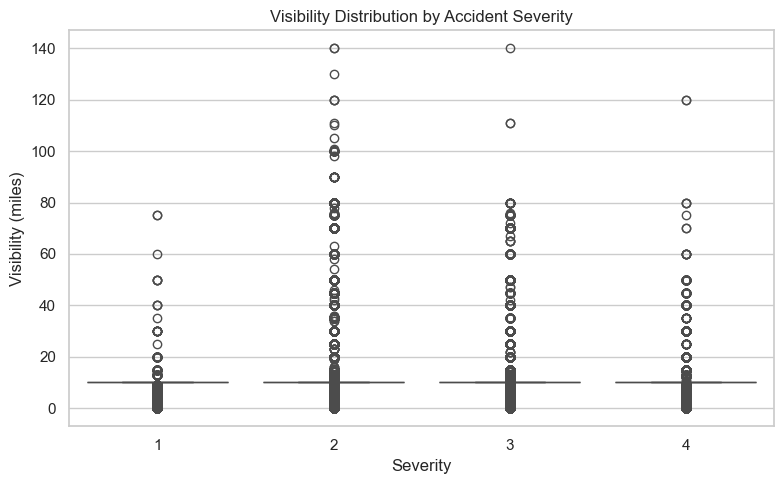

In [8]:
#  Box plot of visibility by severity

plt.figure(figsize=(8,5))
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)

plt.title("Visibility Distribution by Accident Severity")
plt.xlabel("Severity")
plt.ylabel("Visibility (miles)")
plt.tight_layout()
plt.show()


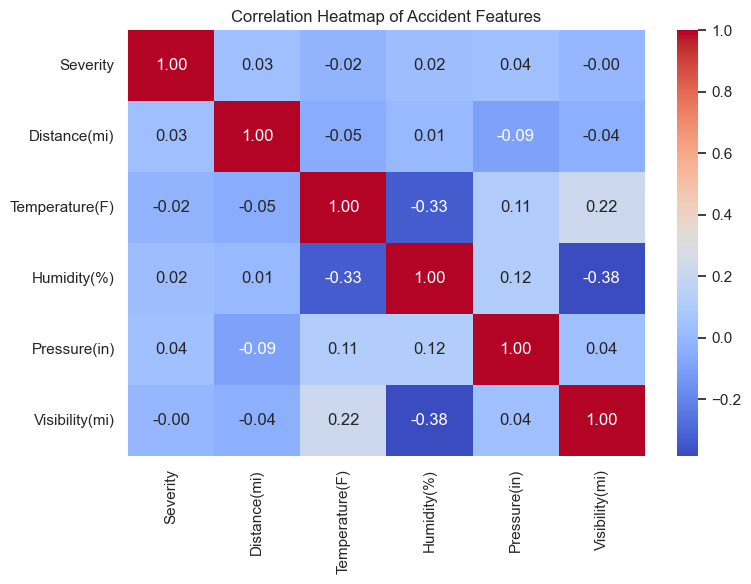

In [9]:
#  Correlation heatmap for numeric features

numeric_cols = [
    'Severity',
    'Distance(mi)',
    'Temperature(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)'
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap of Accident Features")
plt.tight_layout()
plt.show()
